In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [149]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [150]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [151]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [152]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [154]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [155]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [156]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [157]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [159]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [160]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [161]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.7967 - val_loss: 0.4770 - val_accuracy: 0.8019
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8009 - val_loss: 0.4496 - val_accuracy: 0.8037
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8102 - val_loss: 0.4390 - val_accuracy: 0.8062
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8114 - val_loss: 0.4348 - val_accuracy: 0.8087
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8120 - val_loss: 0.4311 - val_accuracy: 0.8087
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8145 - val_loss: 0.4286 - val_accuracy: 0.8081
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8153 - val_loss: 0.4250 - val_accuracy: 0.8025

In [164]:
# X_test.shape
# X_test_trf.shape
y_test.shape


(2000,)

In [170]:
y_pred = model.predict(X_test_trf)
y_pred.shape

(2000, 1)

In [171]:
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)


(2000, 1)


In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.855

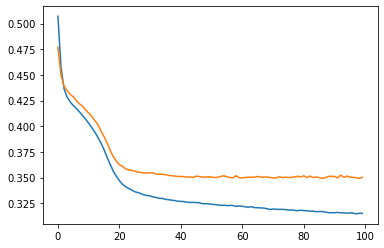

In [173]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

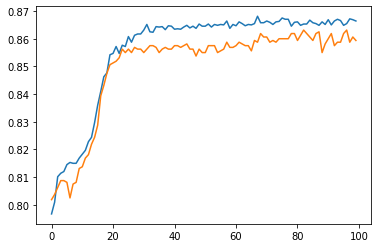

In [174]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])